# V<sub>oc</sub> and V<sub>mp</sub> vs Irradiance and vs Temperature

This evaluation will use the Rich Solar 200W 12V panel

In [2]:
# Setup
import pvlib
from pvlib.pvsystem import PVSystem, Array, FixedMount
from pvlib.location import Location
from pvlib.modelchain import ModelChain
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import solarpanels
import pprint

In [3]:
rich_solar_12V_params = solarpanels.get_rich_solar_MEGA200_12V()
pprint.pprint(rich_solar_12V_params)

{'A_c': 2.188,
 'Adjust': -79.99107249350025,
 'Bifacial': 0,
 'I_L_ref': 10.205721595216158,
 'I_mp_ref': 9.8,
 'I_o_ref': 3.7270352410878284e-16,
 'I_sc_ref': 10.2,
 'Isat1_T0': 2.28618816125344e-11,
 'Isat2_T0': 1.117455042372326e-06,
 'Length': 1.49,
 'N_s': 36,
 'Name': 'Rich Solar MEGA200',
 'PTC': 178.5,
 'Parallel_strings': 1,
 'R_s': 0.17451862762241224,
 'R_sh_ref': 311.11777951831857,
 'Rs_2d': 0.004267236774264931,
 'Rsh_2d': 10.01226369025448,
 'STC': 200.0862,
 'T_NOCT': 45,
 'Technology': 'Mono-c-Si',
 'V_mp_ref': 20.4,
 'V_oc_ref': 24.3,
 'Width': 0.681,
 'a_ref': 0.6421603755096853,
 'alpha_sc': 0.00918,
 'alpha_sc_percent': 0.0009,
 'beta_oc': -0.12685,
 'cell_layout': [[[{'crosstie': False, 'idx': 0},
                   {'crosstie': False, 'idx': 1},
                   {'crosstie': False, 'idx': 2},
                   {'crosstie': False, 'idx': 3},
                   {'crosstie': False, 'idx': 4},
                   {'crosstie': False, 'idx': 5},
                   {

## V<sub>oc</sub> and V<sub>mp</sub> vs Irradiance

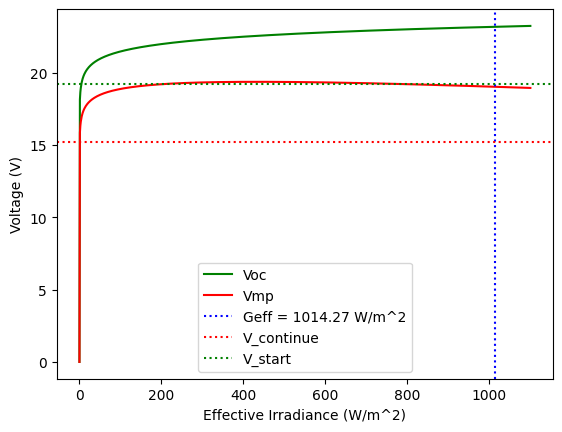

In [4]:
Temp = 68.78

Geff = np.linspace(0, 1100, 1000)

IL, I0, Rs, Rsh, nNsVth = pvlib.pvsystem.calcparams_desoto(
    Geff,
    Temp,
    alpha_sc=rich_solar_12V_params['alpha_sc'],
    a_ref=rich_solar_12V_params['a_ref'],
    I_L_ref=rich_solar_12V_params['I_L_ref'],
    I_o_ref=rich_solar_12V_params['I_o_ref'],
    R_sh_ref=rich_solar_12V_params['R_sh_ref'],
    R_s=rich_solar_12V_params['R_s']
)

# plug the parameters into the SDE and solve for IV curves:
SDE_params = {
    'photocurrent': IL,
    'saturation_current': I0,
    'resistance_series': Rs,
    'resistance_shunt': Rsh,
    'nNsVth': nNsVth
}

curve_info = pvlib.pvsystem.singlediode(method='lambertw', **SDE_params)

plt.figure()
plt.plot(Geff,curve_info['v_oc'], label='Voc', color='g')
plt.plot(Geff,curve_info['v_mp'], label='Vmp', color='r')
#label the axes
plt.xlabel('Effective Irradiance (W/m^2)')
plt.ylabel('Voltage (V)')

#plot a vertical line at Geff = 1014.27 W/m^2
plt.axvline(x=1014.27, color='b', linestyle=':', label='Geff = 1014.27 W/m^2')

# plot a horizontal line at 15.2v for V_continue
plt.axhline(y=15.2, color='r', linestyle=':', label='V_continue')
# plot a horizontal line at 19.2v for V_start
plt.axhline(y=19.2, color='g', linestyle=':', label='V_start')
plt.legend()

## V<sub>oc</sub> and V<sub>mp</sub> vs Temperature

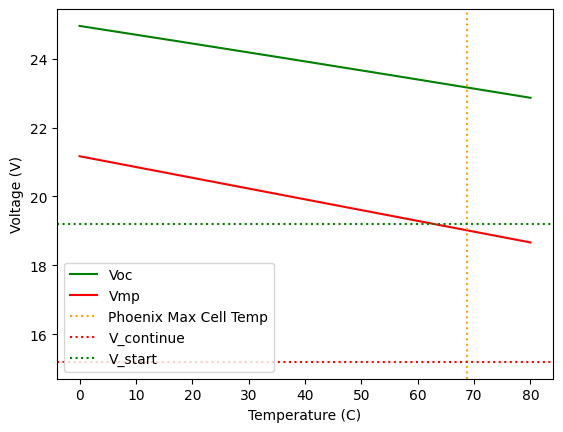

In [5]:
Temp = np.linspace(0, 80, 1000)

Geff = 1014.27

IL, I0, Rs, Rsh, nNsVth = pvlib.pvsystem.calcparams_desoto(
    Geff,
    Temp,
    alpha_sc=rich_solar_12V_params['alpha_sc'],
    a_ref=rich_solar_12V_params['a_ref'],
    I_L_ref=rich_solar_12V_params['I_L_ref'],
    I_o_ref=rich_solar_12V_params['I_o_ref'],
    R_sh_ref=rich_solar_12V_params['R_sh_ref'],
    R_s=rich_solar_12V_params['R_s'],
    )

# plug the parameters into the SDE and solve for IV curves:
SDE_params = {
    'photocurrent': IL,
    'saturation_current': I0,
    'resistance_series': Rs,
    'resistance_shunt': Rsh,
    'nNsVth': nNsVth
}

curve_info = pvlib.pvsystem.singlediode(method='lambertw', **SDE_params)

plt.figure()
plt.plot(Temp,curve_info['v_oc'], label='Voc', color='g')
plt.plot(Temp,curve_info['v_mp'], label='Vmp', color='r')
#label the axes
plt.xlabel('Temperature (C)')
plt.ylabel('Voltage (V)')
#plt.ylim(0, 25)

#plot a vertical line at 68.78C for T_continue
plt.axvline(x=68.78, color='orange', linestyle=':', label='Phoenix Max Cell Temp')

# plot a horizontal line at 15.2v for V_continue
plt.axhline(y=15.2, color='r', linestyle=':', label='V_continue')
# plot a horizontal line at 19.2v for V_start
plt.axhline(y=19.2, color='g', linestyle=':', label='V_start')
plt.legend()

## V<sub>oc</sub> vs P<sub>mp</sub>

In [71]:
Temp = 68.78
#Temp = 25

Geff = np.linspace(0, 100, 1000000)

IL, I0, Rs, Rsh, nNsVth = pvlib.pvsystem.calcparams_desoto(
    Geff,
    Temp,
    alpha_sc=rich_solar_12V_params['alpha_sc'],
    a_ref=rich_solar_12V_params['a_ref'],
    I_L_ref=rich_solar_12V_params['I_L_ref'],
    I_o_ref=rich_solar_12V_params['I_o_ref'],
    R_sh_ref=rich_solar_12V_params['R_sh_ref'],
    R_s=rich_solar_12V_params['R_s']
)

# plug the parameters into the SDE and solve for IV curves:
SDE_params = {
    'photocurrent': IL,
    'saturation_current': I0,
    'resistance_series': Rs,
    'resistance_shunt': Rsh,
    'nNsVth': nNsVth
}

curve_info = pvlib.pvsystem.singlediode(method='lambertw', **SDE_params)


P_start = 0.22192229637919753
Geff[idx_pmp] = 11.307511307511307


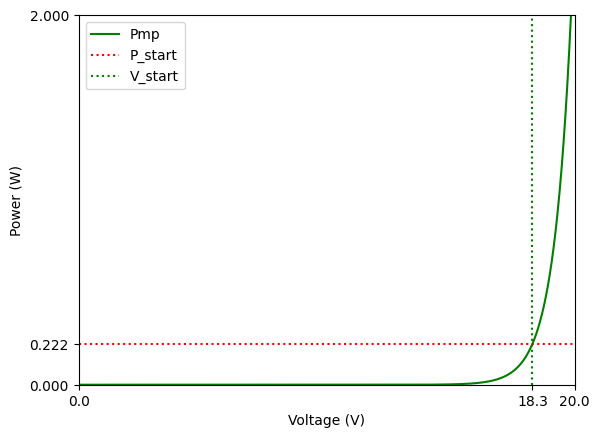

In [72]:

plt.figure()

# create two y-axes
ax1 = plt.gca()

# ensure both y axes intersect the x axis at a y value of 0
ax1.spines['left'].set_position(('outward', 0))

ax1.plot(curve_info['v_oc'], curve_info['p_mp'], label='Pmp', color='g')

#label the axes
ax1.set_xlabel('Voltage (V)')
ax1.set_ylabel('Power (W)')

v_start = 18.3

# find the index where v_oc exceeds 19.2v
idx_v_start = np.where(curve_info['v_oc'] > v_start)[0][0]

# find the index where pmp exceeds 10w
idx_pmp = np.where(curve_info['p_mp'] >= 2)[0][0]

# find the p_mp point for idx_v_start
p_start = curve_info['p_mp'][idx_v_start]
print(f'P_start = {p_start}')

# plot a horizontal line at p_mp for idx_v_start
ax1.axhline(y=p_start, color='r', linestyle=':', label='P_start')

# limit range of y-axis to 0-20
ax1.set_ylim(0, curve_info['p_mp'][idx_pmp])

# add a tick to the y-axis at the the value of p_start
ax1.set_yticks([0, p_start, 2])

# plot a vertical line at 19.2v for V_start
ax1.axvline(x=v_start, color='g', linestyle=':', label='V_start')

# add a tick to the x-axis at the the value of v_start
ax1.set_xticks([0, v_start, 20])

# # second axis
# # create a second y-axis
# ax2 = ax1.twinx()

# # ensure both y axes intersect the x axis at a y value of 0
# ax2.spines['left'].set_position(('outward', 0))

# # plot irradiance on the second y axis
# ax2.plot(curve_info['v_oc'], Geff, label='Geff', linestyle=':' , color='b')

# # set the y-axis ticks to include Geff[idx_v_start]
# ax2.set_yticks([0, Geff[idx_v_start]])
# print(f'Geff[idx_v_start] = {Geff[idx_v_start]}')

# # label the y-axis
# ax2.set_ylabel('Effective Irradiance (W/m^2)')

# # set the x intercept of both y axis to 0
# ax2.spines['left'].set_position(('outward', 0))

# # set the x-axis ticks to include v_start
# plt.xticks([0, v_start])

# # limit the second y-axis to 0-1000
# ax2.set_ylim(0, Geff[idx_pmp+400])
# # use a single legend for both axes
# lines, labels = ax1.get_legend_handles_labels()
# lines2, labels2 = ax2.get_legend_handles_labels()
# ax2.legend(lines + lines2, labels + labels2, loc='upper right')




print(f'Geff[idx_pmp] = {Geff[idx_pmp]}')

plt.xlim(0,20)


# legend
plt.legend()



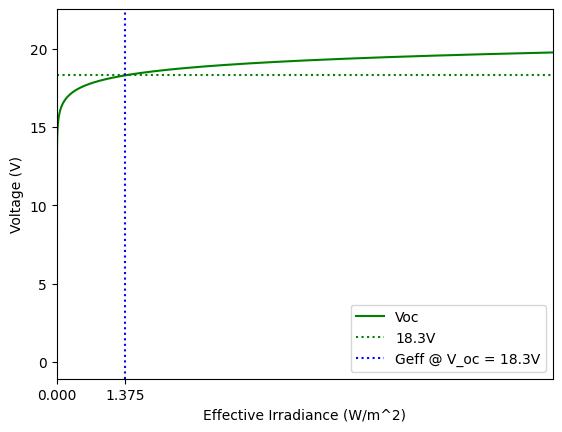

In [13]:
# plot voc vs geff
plt.figure()
plt.plot(Geff,curve_info['v_oc'], label='Voc', color='g')

# plot a horizontal line at 19.2v for V_start
plt.axhline(y=v_start, color='g', linestyle=':', label=f'{v_start}V')
#f'Geff[idx_pmp] = {Geff[idx_pmp]}
# set the limits of the x-axis to 0-1000
plt.xlim(0, 10)

# plot a vertical line at Geff[idx_v_start]
plt.axvline(x=Geff[idx_v_start], color='b', linestyle=':', label=f'Geff @ V_oc = {v_start}V')

# place a tick at Geff[idx_v_start]
plt.xticks([0, Geff[idx_v_start]])

# label the axes
plt.xlabel('Effective Irradiance (W/m^2)')
plt.ylabel('Voltage (V)')

# add a legend
plt.legend()





Looking at very low irradiance

In [99]:
#Temp = 68.78
Temp = 25
lower_exp = -13
upper_exp = 3
Geff_lower = 10 ** lower_exp
Geff_upper = 10 ** upper_exp
#create a logarithmic linspace for Geff
Geff = np.logspace(lower_exp, upper_exp, 10000)

#Geff = np.linspace(0, Geff_upper, 1000000)

IL, I0, Rs, Rsh, nNsVth = pvlib.pvsystem.calcparams_desoto(
    Geff,
    Temp,
    alpha_sc=rich_solar_12V_params['alpha_sc'],
    a_ref=rich_solar_12V_params['a_ref'],
    I_L_ref=rich_solar_12V_params['I_L_ref'],
    I_o_ref=rich_solar_12V_params['I_o_ref'],
    R_sh_ref=rich_solar_12V_params['R_sh_ref'],
    R_s=rich_solar_12V_params['R_s']
)

print('a_ref = ', rich_solar_12V_params['a_ref'])

# plug the parameters into the SDE and solve for IV curves:
SDE_params = {
    'photocurrent': IL,
    'saturation_current': I0,
    'resistance_series': Rs,
    'resistance_shunt': Rsh,
    'nNsVth': nNsVth
}

curve_info = pvlib.pvsystem.singlediode(method='brentq', **SDE_params)

# replace SDE_params['resistance_shunt'] with a constant value = R_sh_ref
SDE_params_constant_rsh = SDE_params.copy()
SDE_params_constant_rsh['resistance_shunt'] = rich_solar_12V_params['R_sh_ref']

# determin SDE_params using calcparams_pvsyst

#calc gamma_ref and mu_gamma
#calc thermal voltage
vth = 1.38064852e-23 * (25 + 273.15) / 1.60217662e-19
gamma_ref = rich_solar_12V_params['a_ref']/(vth * rich_solar_12V_params['N_s'])
mu_gamma = 0.0

IL, I0, Rs, Rsh, nNsVth = pvlib.pvsystem.calcparams_pvsyst(
    Geff,
    Temp,
    alpha_sc=rich_solar_12V_params['alpha_sc'],
    gamma_ref=gamma_ref,
    mu_gamma=mu_gamma,
    I_L_ref=rich_solar_12V_params['I_L_ref'],
    I_o_ref=rich_solar_12V_params['I_o_ref'],
    R_sh_ref=rich_solar_12V_params['R_sh_ref'],
    R_sh_0=rich_solar_12V_params['R_sh_ref'],
    R_s=rich_solar_12V_params['R_s'],
    cells_in_series=rich_solar_12V_params['N_s']
)

SDE_params_pvsyst = {
    'photocurrent': IL,
    'saturation_current': I0,
    'resistance_series': Rs,
    'resistance_shunt': Rsh,
    'nNsVth': nNsVth
}

curve_info_pvsyst = pvlib.pvsystem.singlediode(method='brentq', **SDE_params_pvsyst)




# solve for IV curves using the new SDE_params
curve_info_constant_rsh = pvlib.pvsystem.singlediode(method='brentq', **SDE_params_constant_rsh)


a_ref =  0.6421603755096853


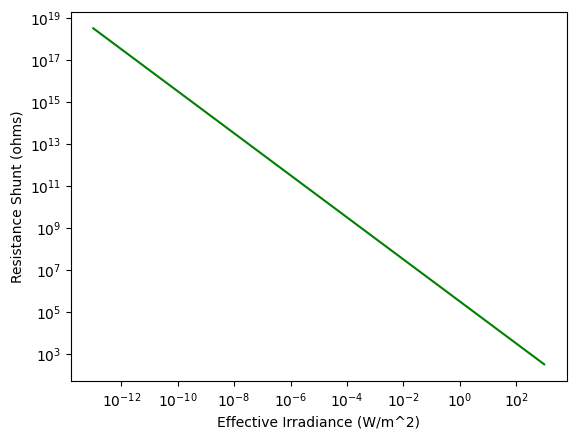

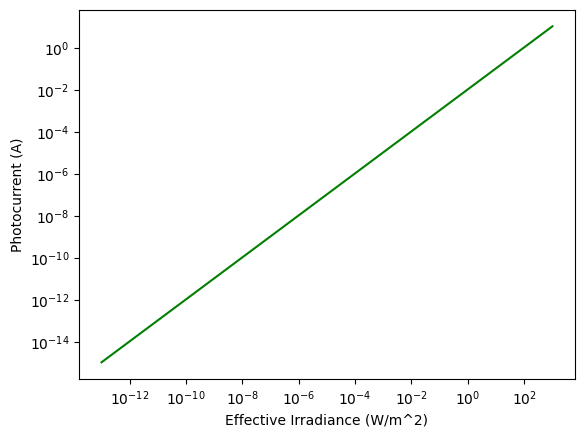

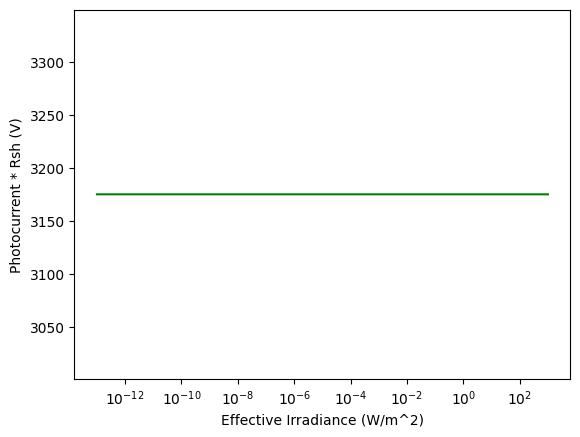

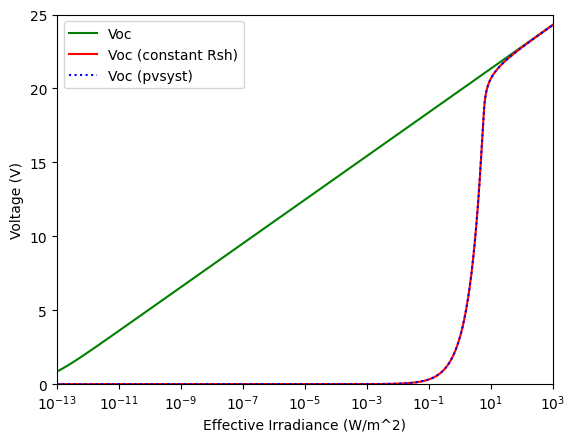

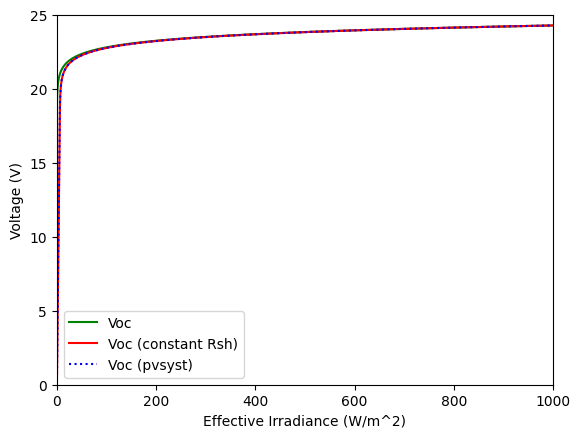

In [100]:
# plot Rsh vs Geff with a log-log 
plt.figure()
plt.plot(Geff, SDE_params['resistance_shunt'], label='Rsh', color='g')
plt.xscale('log')
plt.yscale('log')
# label the axes
plt.xlabel('Effective Irradiance (W/m^2)')
plt.ylabel('Resistance Shunt (ohms)')

# plot I_L vs Geff with a log scale on the x-axis
plt.figure()
plt.plot(Geff, SDE_params['photocurrent'], label='I_L', color='g')
plt.xscale('log')
plt.yscale('log')
# label the axes
plt.xlabel('Effective Irradiance (W/m^2)')
plt.ylabel('Photocurrent (A)')

# plot the product of I_L and Rsh vs Geff with a log scale on the x-axis
plt.figure()
plt.plot(Geff, SDE_params['photocurrent']*SDE_params['resistance_shunt'], label='I_L * Rsh', color='g')
plt.xscale('log')
# label the axes
plt.xlabel('Effective Irradiance (W/m^2)')
plt.ylabel('Photocurrent * Rsh (V)')



# plot voc vs geff with a log scale on the x-axis
plt.figure()
plt.plot(Geff, curve_info['v_oc'], label='Voc', color='g')

# add a second line for the IV curve with a constant Rsh
plt.plot(Geff, curve_info_constant_rsh['v_oc'], label='Voc (constant Rsh)', color='r')

# add a third line for the IV curve with pvsyst parameters
plt.plot(Geff, curve_info_pvsyst['v_oc'],linestyle=':', label='Voc (pvsyst)', color='b')

# label the axes
plt.xlabel('Effective Irradiance (W/m^2)')
plt.ylabel('Voltage (V)')

# set the x-axis to log scale
plt.xscale('log')

# plot over the range 0 to v_start and the corresponding irradiance
plt.ylim(0, 25)
plt.xlim(Geff_lower, Geff_upper)


# add a legend
plt.legend()

# plot voc vs geff with with a linear scale on the x-axis
plt.figure()
plt.plot(Geff,curve_info['v_oc'], label='Voc', color='g')

# add a second line for the IV curve with a constant Rsh
plt.plot(Geff, curve_info_constant_rsh['v_oc'], label='Voc (constant Rsh)', color='r')

# add a third line for the IV curve with pvsyst parameters
plt.plot(Geff, curve_info_pvsyst['v_oc'], linestyle=':', label='Voc (pvsyst)', color='b')

# label the axes
plt.xlabel('Effective Irradiance (W/m^2)')
plt.ylabel('Voltage (V)')

# plot over the range 0 to v_start and the corresponding irradiance
plt.ylim(0, 25)
plt.xlim(0, Geff_upper)


# add a legend
plt.legend()

# We will repeat our previous plots using brentq and desoto's original formula for Rsh (which is simply constant)

## Data Gen code

In [73]:
Temp = 68.78
#Temp = 25
lower_exp = -13
upper_exp = 3
Geff_lower = 10 ** lower_exp
Geff_upper = 10 ** upper_exp
#create a logarithmic linspace for Geff
Geff = np.logspace(lower_exp, upper_exp, 10000)

#Geff = np.linspace(0, Geff_upper, 1000000)

IL, I0, Rs, Rsh, nNsVth = pvlib.pvsystem.calcparams_desoto(
    Geff,
    Temp,
    alpha_sc=rich_solar_12V_params['alpha_sc'],
    a_ref=rich_solar_12V_params['a_ref'],
    I_L_ref=rich_solar_12V_params['I_L_ref'],
    I_o_ref=rich_solar_12V_params['I_o_ref'],
    R_sh_ref=rich_solar_12V_params['R_sh_ref'],
    R_s=rich_solar_12V_params['R_s']
)

# plug the parameters into the SDE and solve for IV curves:
SDE_params = {
    'photocurrent': IL,
    'saturation_current': I0,
    'resistance_series': Rs,
    'resistance_shunt': Rsh,
    'nNsVth': nNsVth
}

curve_info = pvlib.pvsystem.singlediode(method='brentq', **SDE_params)

# replace SDE_params['resistance_shunt'] with a constant value = R_sh_ref
SDE_params_constant_rsh = SDE_params.copy()
SDE_params_constant_rsh['resistance_shunt'] = rich_solar_12V_params['R_sh_ref']

# solve for IV curves using the new SDE_params
curve_info = pvlib.pvsystem.singlediode(method='brentq', **SDE_params_constant_rsh)

P_start = 0.9467476120364933
Geff[idx_pmp] = 16.497636948654485


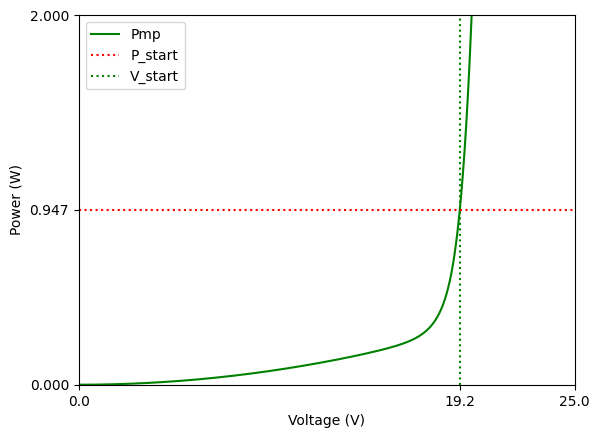

In [77]:

plt.figure()

# create two y-axes
ax1 = plt.gca()

# ensure both y axes intersect the x axis at a y value of 0
ax1.spines['left'].set_position(('outward', 0))

ax1.plot(curve_info['v_oc'], curve_info['p_mp'], label='Pmp', color='g')

#label the axes
ax1.set_xlabel('Voltage (V)')
ax1.set_ylabel('Power (W)')

v_start = 19.2

# find the index where v_oc exceeds 19.2v
idx_v_start = np.where(curve_info['v_oc'] > v_start)[0][0]

# find the index where pmp exceeds 10w
idx_pmp = np.where(curve_info['p_mp'] >= 2)[0][0]

# find the p_mp point for idx_v_start
p_start = curve_info['p_mp'][idx_v_start]
print(f'P_start = {p_start}')

# plot a horizontal line at p_mp for idx_v_start
ax1.axhline(y=p_start, color='r', linestyle=':', label='P_start')

# limit range of y-axis to 0-20
ax1.set_ylim(0, curve_info['p_mp'][idx_pmp])

# add a tick to the y-axis at the the value of p_start
ax1.set_yticks([0, p_start, 2])

# plot a vertical line at 19.2v for V_start
ax1.axvline(x=v_start, color='g', linestyle=':', label='V_start')

# add a tick to the x-axis at the the value of v_start
ax1.set_xticks([0, v_start, 25])

print(f'Geff[idx_pmp] = {Geff[idx_pmp]}')

plt.xlim(0,25)


# legend
plt.legend()



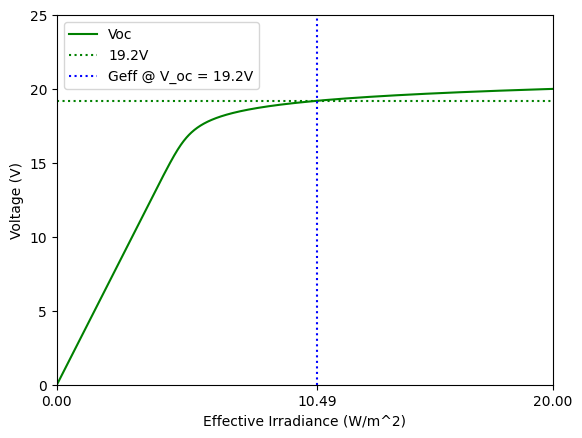

In [82]:
# plot voc vs geff
plt.figure()
plt.plot(Geff,curve_info['v_oc'], label='Voc', color='g')

# plot a horizontal line at 19.2v for V_start
plt.axhline(y=v_start, color='g', linestyle=':', label=f'{v_start}V')
#f'Geff[idx_pmp] = {Geff[idx_pmp]}
# set the limits of the x-axis to 0-1000
plt.xlim(0, 20)
plt.ylim(0, 25)

# plot a vertical line at Geff[idx_v_start]
plt.axvline(x=Geff[idx_v_start], color='b', linestyle=':', label=f'Geff @ V_oc = {v_start}V')

# place a tick at Geff[idx_v_start]
plt.xticks([0, Geff[idx_v_start], 20])

# label the axes
plt.xlabel('Effective Irradiance (W/m^2)')
plt.ylabel('Voltage (V)')

# add a legend
plt.legend()